In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
import matplotlib.pyplot as plt
import pymc3 as pm
from IPython.core.pylabtools import figsize
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')
sns.set()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\kisha\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\kisha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# hourlydf = pd.read_csv(r'C:\Users\kisha\Documents\Springboard Data Science\Capstone Project 1\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\Hourly-Consolidated-cellid_day.txt',delimiter='\t')
hourlydf = pd.read_pickle('hourlydf.p')

In [3]:
hourlydf.iloc[::100000]

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum
timeIntervalts,,,,,,,,,,,,
2013-11-01 00:00:00+01:00,1,8299571400000,2.084285,1.104749,0.591930,0.429290,57.799009,3.189034,1.021221,0,Friday,4
2013-12-07 16:00:00+01:00,71,8318579400000,5.439302,4.080989,3.566774,4.921197,91.608034,9.520291,8.487971,16,Saturday,5
2013-11-16 14:00:00+01:00,142,8307649800000,5.043325,15.496752,4.778215,4.045091,66.746060,20.540077,8.823306,14,Saturday,5
2013-12-24 11:00:00+01:00,212,8327284200000,5.949796,2.324965,4.349472,4.894890,23.199024,8.274761,9.244362,11,Tuesday,1
2013-12-02 03:00:00+01:00,283,8315706600000,0.091614,0.022904,0.000000,0.000000,5.001055,0.114518,0.000000,3,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-16 10:00:00+01:00,9677,8323115400000,51.853791,18.978159,54.413618,65.294730,795.214537,70.831950,119.708347,10,Monday,0
2013-11-24 02:00:00+01:00,9748,8311537800000,1.590960,0.504737,0.105154,0.450351,295.781672,2.095697,0.555504,2,Sunday,6
2013-11-01 18:00:00+01:00,9819,8299960200000,16.091510,7.017818,7.930460,11.230761,176.906108,23.109328,19.161220,18,Friday,4


In [5]:
hourlydf['callIn-1'] = hourlydf['callIn'].shift(1)
hourlydf[hourlydf.cellId==2]

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum,callIn-1
timeIntervalts,,,,,,,,,,,,,
2013-11-01 00:00:00+01:00,2,8299571400000,2.091501,1.087979,0.602031,0.438173,57.914858,3.179480,1.040205,0,Friday,4,0.363389
2013-11-01 01:00:00+01:00,2,8299593000000,1.178439,0.773207,0.192136,0.193979,44.151457,1.951646,0.386115,1,Friday,4,0.602031
2013-11-01 02:00:00+01:00,2,8299614600000,0.415258,0.302315,0.028278,0.137535,41.329761,0.717573,0.165812,2,Friday,4,0.192136
2013-11-01 03:00:00+01:00,2,8299636200000,1.151394,0.902170,0.000922,0.027356,33.078556,2.053564,0.028278,3,Friday,4,0.028278
2013-11-01 04:00:00+01:00,2,8299657800000,0.357948,0.520075,0.002765,0.027356,31.453361,0.878023,0.030121,4,Friday,4,0.000922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-29 19:00:00+01:00,2,8330049000000,4.560292,2.759525,3.134937,3.687253,78.744624,7.319818,6.822189,19,Sunday,6,3.600355
2013-12-29 20:00:00+01:00,2,8330070600000,4.525730,3.446711,2.268283,3.089218,84.623530,7.972442,5.357502,20,Sunday,6,3.134937
2013-12-29 21:00:00+01:00,2,8330092200000,4.557750,3.710234,2.176134,2.406851,76.026337,8.267984,4.582985,21,Sunday,6,2.268283


In [4]:
# hourlydf['callIn-1'] = hourlydf['callIn'].shift(1)
hourlydf['callIn-1'] = hourlydf.groupby('cellId')['callIn'].apply(lambda x: x.shift(1))
hourlydf['callIn-2'] = hourlydf.groupby('cellId')['callIn'].apply(lambda x: x.shift(2))
hourlydf['callOut-1'] = hourlydf.groupby('cellId')['callOut'].apply(lambda x: x.shift(1))
hourlydf['callOut-2'] = hourlydf.groupby('cellId')['callOut'].apply(lambda x: x.shift(2))
hourlydf['SMSin-1'] = hourlydf.groupby('cellId')['SMSin'].apply(lambda x: x.shift(1))
hourlydf['SMSin-2'] = hourlydf.groupby('cellId')['SMSin'].apply(lambda x: x.shift(2))
hourlydf = hourlydf.dropna()
hourlydf[hourlydf.cellId==2]

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum,callIn-1,callIn-2,callOut-1,callOut-2,SMSin-1,SMSin-2
timeIntervalts,,,,,,,,,,,,,,,,,,
2013-11-01 02:00:00+01:00,2,8299614600000,0.415258,0.302315,0.028278,0.137535,41.329761,0.717573,0.165812,2,Friday,4,0.192136,0.602031,0.193979,0.438173,1.178439,2.091501
2013-11-01 03:00:00+01:00,2,8299636200000,1.151394,0.902170,0.000922,0.027356,33.078556,2.053564,0.028278,3,Friday,4,0.028278,0.192136,0.137535,0.193979,0.415258,1.178439
2013-11-01 04:00:00+01:00,2,8299657800000,0.357948,0.520075,0.002765,0.027356,31.453361,0.878023,0.030121,4,Friday,4,0.000922,0.028278,0.027356,0.137535,1.151394,0.415258
2013-11-01 05:00:00+01:00,2,8299679400000,0.168688,0.195933,0.028278,0.191436,34.916612,0.364621,0.219714,5,Friday,4,0.002765,0.000922,0.027356,0.027356,0.357948,1.151394
2013-11-01 06:00:00+01:00,2,8299701000000,0.220580,0.113921,0.221501,0.164080,35.504967,0.334501,0.385582,6,Friday,4,0.028278,0.002765,0.191436,0.027356,0.168688,0.357948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-29 19:00:00+01:00,2,8330049000000,4.560292,2.759525,3.134937,3.687253,78.744624,7.319818,6.822189,19,Sunday,6,3.600355,3.000810,3.528313,3.277246,4.742791,4.322813
2013-12-29 20:00:00+01:00,2,8330070600000,4.525730,3.446711,2.268283,3.089218,84.623530,7.972442,5.357502,20,Sunday,6,3.134937,3.600355,3.687253,3.528313,4.560292,4.742791
2013-12-29 21:00:00+01:00,2,8330092200000,4.557750,3.710234,2.176134,2.406851,76.026337,8.267984,4.582985,21,Sunday,6,2.268283,3.134937,3.089218,3.687253,4.525730,4.560292


In [5]:
# first 3 weeks train -->23-11-2013
# 4th week test --> 30-11-2013
# 5,6th week hold out 14-12-2013

train_data = hourlydf[hourlydf.index< '23-11-2013']
test_data = hourlydf[(hourlydf.index> '23-11-2013') & (hourlydf.index< '30-11-2013')]
hold_data = hourlydf[(hourlydf.index> '30-11-2013') & (hourlydf.index< '14-12-2013')]

In [6]:
train_data

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum,callIn-1,callIn-2,callOut-1,callOut-2,SMSin-1,SMSin-2
timeIntervalts,,,,,,,,,,,,,,,,,,
2013-11-01 02:00:00+01:00,1,8299614600000,0.415579,0.300391,0.027925,0.135964,41.207149,0.715969,0.163888,2,Friday,4,0.190564,0.591930,0.194139,0.429290,1.163624,2.084285
2013-11-01 03:00:00+01:00,1,8299636200000,1.152067,0.895724,0.001787,0.026137,33.022070,2.047791,0.027925,3,Friday,4,0.027925,0.190564,0.135964,0.194139,0.415579,1.163624
2013-11-01 04:00:00+01:00,1,8299657800000,0.354453,0.511192,0.005362,0.026137,31.376930,0.865645,0.031499,4,Friday,4,0.001787,0.027925,0.026137,0.135964,1.152067,0.415579
2013-11-01 05:00:00+01:00,1,8299679400000,0.166924,0.195388,0.027925,0.184125,34.841592,0.362312,0.212050,5,Friday,4,0.005362,0.001787,0.026137,0.026137,0.354453,1.152067
2013-11-01 06:00:00+01:00,1,8299701000000,0.215000,0.115812,0.216787,0.157988,35.416125,0.330812,0.374775,6,Friday,4,0.027925,0.005362,0.184125,0.026137,0.166924,0.354453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-22 19:00:00+01:00,10000,8310868200000,12.640988,6.505709,12.474448,14.908168,169.199672,19.146697,27.382616,19,Friday,4,16.444502,13.147428,16.602065,18.097842,15.363911,19.008028
2013-11-22 20:00:00+01:00,10000,8310889800000,12.155348,7.313473,7.891301,9.406376,164.327627,19.468821,17.297677,20,Friday,4,12.474448,16.444502,14.908168,16.602065,12.640988,15.363911
2013-11-22 21:00:00+01:00,10000,8310911400000,7.527928,3.857541,5.219885,5.737733,156.905997,11.385469,10.957618,21,Friday,4,7.891301,12.474448,9.406376,14.908168,12.155348,12.640988


# Linear Regression

In [7]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

model = LinearRegression()
model.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

# model.score(test_data[['callIn','callIn-1','callIn-2']],test_data['SMSin'])

Wall time: 3.18 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
%%time
pred = model.predict(test_data[['callIn','callIn-1','callIn-2']])
y_test = test_data['SMSin']
mae1 = mae(y_test, pred)
mse1 = mse(y_test, pred)
r21 = r2_score(y_test, pred)
print(f'{mae1:.2f}, {mse1:.2f}, {r21:.2f}')

6.91, 355.92, 0.93
Wall time: 211 ms


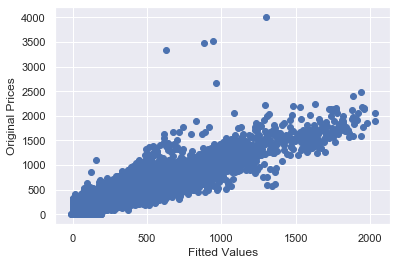

In [10]:
predicted=model.predict(test_data[['callIn','callIn-1','callIn-2']])
plt.scatter(predicted, test_data['SMSin'])
plt.xlabel('Fitted Values')
plt.ylabel('Original Prices')
plt.show()

In [13]:
%%time
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=np.logspace(-10, 10, 20))
model.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])


AttributeError: 'RidgeCV' object has no attribute 'cv_values_'

In [20]:
model.coef_, model.intercept_, model.alpha_

array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])

In [22]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = np.logspace(-10, 10, 20)
param_grid = {'alpha': alphas}
# Create a based model
ridge_grid = Ridge()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ridge_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   39.4s finished


Wall time: 42.3 s


{'alpha': 1e-10}

In [11]:
%%time
from sklearn.linear_model import Ridge, RidgeCV
for i in np.linspace(-200,200,20):
    model = Ridge(alpha=i)
    model.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])
    print('alpha: {}, score {}'.format(i, model.score(test_data[['callIn','callIn-1','callIn-2']],test_data['SMSin'])))
    

alpha: -200.0, score 0.9275185146620516
alpha: -178.94736842105263, score 0.9275185146812248
alpha: -157.89473684210526, score 0.9275185147003979
alpha: -136.8421052631579, score 0.9275185147195707
alpha: -115.78947368421052, score 0.9275185147387435
alpha: -94.73684210526315, score 0.9275185147579158
alpha: -73.68421052631578, score 0.927518514777088
alpha: -52.63157894736841, score 0.9275185147962601
alpha: -31.57894736842104, score 0.9275185148154319
alpha: -10.52631578947367, score 0.9275185148346035
alpha: 10.5263157894737, score 0.927518514853775
alpha: 31.57894736842107, score 0.9275185148729461
alpha: 52.63157894736844, score 0.9275185148921172
alpha: 73.68421052631584, score 0.927518514911288
alpha: 94.73684210526318, score 0.9275185149304587
alpha: 115.78947368421052, score 0.9275185149496291
alpha: 136.84210526315792, score 0.9275185149687993
alpha: 157.89473684210532, score 0.9275185149879693
alpha: 178.94736842105266, score 0.9275185150071391
alpha: 200.0, score 0.92751851

In [12]:
%%time
model = Ridge(alpha=1)
model.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

Wall time: 370 ms


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [13]:
%%time
pred = model.predict(test_data[['callIn','callIn-1','callIn-2']])
y_test = test_data['SMSin']
mae1 = mae(y_test, pred)
mse1 = mse(y_test, pred)
r21 = r2_score(y_test, pred)
print(f'{mae1:.2f}, {mse1:.2f}, {r21:.2f}')

6.91, 355.92, 0.93
Wall time: 155 ms


In [38]:
%%time
model = Ridge(alpha=-10)
model.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

Wall time: 308 ms


Ridge(alpha=-10, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('mape: {}'.format(mape))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    
    return accuracy

In [44]:
print(model.coef_, model.intercept_)

[ 0.87059906 -0.12694947  0.18196284  0.62360557 -0.20883563  0.04735395] 0.829848727920691


# KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor()
model1.fit(train_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']],train_data['SMSin'])
predicted1=model1.predict(test_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']])
model1.score(test_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']],test_data['SMSin'])

0.9348087428968794

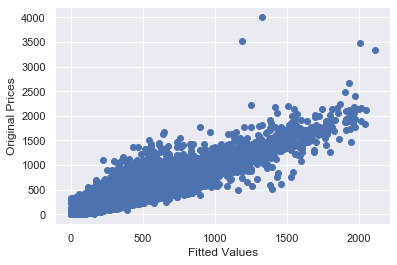

In [47]:
plt.scatter(predicted1, test_data['SMSin'])
plt.xlabel('Fitted Values')
plt.ylabel('Original Prices')
plt.show()

# SVM SVR - RBF Kernel

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

svr_rbf.fit(train_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']],train_data['SMSin'])
svr_rbf.predict(test_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']])
svr_rbf.score(test_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']],test_data['SMSin'])

# SVM SVR - Linear Kernel

In [ ]:
from sklearn.svm import SVR
svr_l = SVR(kernel='linear', C=100, gamma='auto')

svr_l.fit(train_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']],train_data['SMSin'])
# svr_l.predict(test_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']])
svr_l.score(test_data[['callIn','callIn-1','callIn-2','callOut','callOut-1','callOut-2']],test_data['SMSin'])

### RandomForestRegressor with GridSearchCV

In [24]:
%%time
from sklearn.ensemble import RandomForestRegressor

Wall time: 753 ms


In [26]:
%%time
#training
rf = RandomForestRegressor(bootstrap= True, max_depth= 30, max_features= 'auto', min_samples_leaf= 4
                           , min_samples_split= 5, n_estimators= 600)
rf.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

Wall time: 1d 6h 50s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
%%time
#exeuction
pred1 = rf.predict(test_data[['callIn','callIn-1','callIn-2']])

Wall time: 56min 30s


In [ ]:
#evalution
rf.score(test_data[['callIn','callIn-1','callIn-2']],test_data['SMSin'])

In [29]:
maeR = mae(test_data["SMSin"], pred1)
mseR = mse(test_data['SMSin'], pred1)
r2R = r2_score(test_data['SMSin'], pred1)
print(f'mae : {maeR:.2f}, mse : {mseR:.2f}, r2 : {r2R:.2f}')

mae : 6.07, mse : 314.81, r2 : 0.9358896993325719


### KNN with 10 Neighbors

In [11]:
%%time
#training
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(10)
model1.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

Wall time: 26.2 s


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [13]:
%%time
#exeuction
pred = model1.predict(test_data[['callIn','callIn-1','callIn-2']])

Wall time: 42.9 s


In [14]:
#evalution
model1.score(test_data[['callIn','callIn-1','callIn-2']],test_data['SMSin'])

0.9333530924572782

In [23]:
maeK = mae(test_data["SMSin"], pred)
mseK = mse(test_data['SMSin'], pred)
r2K = r2_score(test_data['SMSin'], pred)
print(f'mae : {maeK:.2f}, mse : {mseK:.2f}, r2 : {r2K:.2f}')

mae : 6.34, mse : 327.27, r2 : 0.93


In [38]:
df_results = pd.DataFrame([['KNN',maeK,mseK,r2K,26.2,42.9]]
                       , columns=['model','mae','mse','r2','trainingTime','executionTime'])

In [ ]:
### KNN with 10 Neighbors

%%time
#training
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(10)
model1.fit(train_data[['callIn','callIn-1','callIn-2']],train_data['SMSin'])

%%time
#exeuction
pred = model1.predict(test_data[['callIn','callIn-1','callIn-2']])

#evalution
model1.score(test_data[['callIn','callIn-1','callIn-2']],test_data['SMSin'])

maeK = mae(test_data["SMSin"], pred)
mseK = mse(test_data['SMSin'], pred)
r2K = r2_score(test_data['SMSin'], pred)
print(f'mae : {maeK:.2f}, mse : {mseK:.2f}, r2 : {r2K:.2f}')

df_results = pd.DataFrame([['KNN',maeK,mseK,r2K,26.2,42.9]]
                       , columns=['model','mae','mse','r2','trainingTime','executionTime'])